<a href="https://colab.research.google.com/github/SaraElwatany/LDA-Implementation-From-Scratch/blob/main/Assignment_2_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
targets_encoded = dataset.target_names

In [ ]:
features_encoded = dataset.feature_names

In [ ]:
# Convert to Dataframe & Visualize the table
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# A function that returns the Eigenvectors & Eigenvalues sorted descindingly
def sort_eigens(eigen_values, eigen_vectors):

  # Get the indicies of the eigenvalues from the original unsorted vector after sorting it descindingly
  idx = eigen_values.argsort()[::-1]

  # Sort Eigenvalues & Eigenvectors Descendingly
  sorted_values = eigen_values[idx]
  sorted_vectors = eigen_vectors[:,idx]

  return sorted_vectors, sorted_values  # Return Sorted Eigenvectors & Eigenvalues

In [ ]:
def perform_lda(dataset, n_components=2):

  # Get the Features/Variables & Targets From Our Data Matrix
  x = dataset.data
  y = dataset.target

  # Get the Unique Classes/Categories In Our Data Matrix
  unique_classes = np.unique(y)
  no_classes = len(unique_classes)  # Get number of unique classes
  mean_classes = np.array([np.mean(x[dataset.target == category], axis=0) for category in unique_classes])    # Get the mean of features/variables for each unique classes
  print('- Number Of Unique Classes: ', len(mean_classes))
  print('- Shape Of Mean Classes Matrix: ', mean_classes.shape)
  print('- Mean Classes Matrix: \n', mean_classes)

  # If the number required components is greater than (No_classes - 1) then set it to (No_classes - 1)
  if (n_components > (no_classes-1)):
    n_components = no_classes-1


  # Get the overall mean of the features
  data_mean = np.mean(x, axis=0)
  print('- Overall Data Mean Vector: ', data_mean)


  # Get A Vector Containing The Number of samples in each class/category
  no_samples_per_class = np.array([np.count_nonzero(x[dataset.target == category], axis=0)[0] for category in unique_classes])#.reshape(3, 1)
  print('- Number Of Samples Per Class Vector: ', no_samples_per_class)
  print('- Shape Of Number Of Samples Per Class Vector: ', no_samples_per_class.shape)


  # Initialize the Normalized Data Matrix (each data point normalized within its class range)
  x_normalized = np.zeros(shape=x.shape)
  print("- Empty Normalized Data Matrix's Shape: ", x_normalized.shape)

  # Normalize each class
  for category in range(0, no_classes):
    masked_data = x[dataset.target == category]
    masked_data = masked_data - mean_classes[category]
    x_normalized[dataset.target == category] = masked_data
  # print("Normalized Data Matrix: ", x_normalized)
  # print("Normalized Data Matrix's Shape: ", x_normalized.shape)


  # Get Within Class Scatter
  s_w = np.sum(np.array([np.dot(x_normalized[dataset.target == category].T, x_normalized[dataset.target == category]) for category in unique_classes]) , axis=0)
  print("- Within Class Scatter Matrix: \n", s_w)
  print("- Within Class Scatter Matrix's Shape: ", s_w.shape)


  # Get Between Class Scatter
  #s_b = np.sum(np.array([no_samples_per_class[category] * np.dot((mean_classes[category]-data_mean).reshape(x.shape[1], 1) , (mean_classes[category]-data_mean).reshape(x.shape[1], 1).T) for category in unique_classes]), axis=0)
  s_b = np.sum(np.array([no_samples_per_class[category] * np.dot((mean_classes[category]-data_mean).reshape(x.shape[1], 1) , (mean_classes[category]-data_mean).reshape(x.shape[1], 1).T) for category in unique_classes]), axis=0)
  print("- Between Class Scatter Matrix: \n", s_b)
  print("- Between Class Scatter Matrix's Shape: ", s_b.shape)


  # Get Axes
  ax = np.dot(np.linalg.inv(s_w), s_b)
  print("- Axes Matrix: \n", ax)
  print("- Axes Matrix's Shape: ", ax.shape)


  # Get Eigenvalues & Eigenvectors
  eigen_values , eigen_vectors = np.linalg.eig(ax)


  # Sort Eigenvalues & Eigenvectors
  sorted_eigen_vectors , sorted_eigen_values = sort_eigens(eigen_values, eigen_vectors)
  print("- Sorted Eigenvalues: ", sorted_eigen_values)
  print("- Sorted Eigenvectors: \n", sorted_eigen_vectors)


  # Project The Data on the N Strongest Eigenvectors
  lda = np.dot(x, sorted_eigen_vectors[:,:n_components])
  #print(sorted_eigen_vectors[:,:n_components])
  #print("- Projected Data Matrix: \n", lda)
  print("- Projected Data Matrix's Shape: ", lda.shape)


  return sorted_eigen_values, sorted_eigen_vectors , lda

In [ ]:
# A function that performs PCA using the Covariance Matrix on the Iris Dataset
def perform_pca(dataset, n_components=2):

  # Get the Features/Variables & Targets From Our Data Matrix
  x = dataset.data
  y = dataset.target

  # Normalize the dataset
  X_normalized = x - np.mean(x, axis=0)

  # Transpose the dataset
  print('- Shape of features Before Transpose: ', X_normalized.shape)
  X_normalized = X_normalized.T
  print('- Shape of features After Transpose: ', X_normalized.shape)

  # Get Covariance Matrix
  cov_mat = np.cov(X_normalized)
  print('- Shape of Covariance Matrix: ', cov_mat.shape)
  print('- Covariance Matrix: \n', cov_mat)

  # Get Eigenvalues & Eigenvectors From Covariance Matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
  print('- Eigenvalues: ', eigenvalues)
  print('- Eigenvectors: \n', eigenvectors)

  # Sorting the Eigenvalues & Eigenvectors Descendingly
  sorted_vectors, sorted_values = sort_eigens(eigenvalues, eigenvectors)


  # Get Principal Components
  z = np.dot(X_normalized.T, sorted_vectors[:, :n_components])
  print(f'- Principal Components of shape {z.shape} : \n', z)

  return sorted_vectors, sorted_values, z    # Return the Eigenvectors, Eigenvalues & Principal Components respectively

In [ ]:
# A function that plots all of the principal components in one figure
def plot_all_components(dataset, feature_names=features_encoded, targets=targets_encoded):

  # Get the Features/Variables & the Targets
  x = dataset.data
  y = dataset.target

  # Create a figure and divide it into 16 subplots
  fig, axs = plt.subplots(4, 4, figsize=(15, 15))

  # Get the number of Principal Components
  n_components = x.shape[1]

  # Plot the results
  for component_1 in range(0, n_components):
    for component_2 in range(0, n_components):
      # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
      for target in np.unique(y):
              axs[component_1, component_2].scatter(x[y == target, component_1], x[y == target, component_2], label=targets[target])
      axs[component_1, component_2].set_xlabel(feature_names[component_1])
      axs[component_1, component_2].set_ylabel(feature_names[component_2])
      axs[component_1, component_2].legend()

  # Adjust layout and display the plots
  plt.tight_layout()
  plt.show()

In [ ]:
# A function that plots all of the principal components in one figure
def plot_projected_components(projected_data, targets=targets_encoded, title='LDA Components'):

  # Create a Figure with one subplot
  fig, ax = plt.subplots()

  # Get the Features/Variables & the Targets
  x = projected_data
  y = dataset.target

  # Get the number of Principal Components
  n_components = x.shape[1]

  # Plot the components
  if (n_components == 2):
    # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
    for target in np.unique(y):
           ax.scatter(x[y == target, 0], x[y == target, 1], label=targets[target])
    ax.set_xlabel('First Component')
    ax.set_ylabel('Second Component')
    ax.set_title(title)
    ax.legend()

  elif (n_components==1):
    # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
    for target in np.unique(y):
           ax.scatter(x[y == target, 0], np.zeros_like(x[y == target, 0]), label=targets[target])
    ax.set_xlabel('First Component')
    ax.set_title(title)
    ax.legend()

  # Adjust layout and display the plots
  plt.tight_layout()
  plt.show()

In [ ]:
# A function that plots all of the principal components in one figure
def plot_pca_lda_components(projected_data_pca, projected_data_lda, targets=targets_encoded):

  # Create a Figure & Divide it into 2 subplots
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  # Get the Features/Variables & the Targets
  x_1 = projected_data_pca
  x_2 = projected_data_lda
  y = dataset.target


  x = [x_1, x_2]
  titles = ['PCA Components', 'LDA Components']



  print(x[1].shape)

  # Get the number of Principal Components
  n_components = x_1.shape[1]

  # Plot the components
  if (n_components == 2):
    for plot in range(0, 2):
      x_temp = x[plot]
      # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
      for target in np.unique(y):
            axs[plot].scatter(x_temp[y == target, 0], x_temp[y == target, 1], label=targets[target])
      axs[plot].set_xlabel('First Component')
      axs[plot].set_ylabel('Second Component')
      axs[plot].set_title(titles[plot])
      axs[plot].legend()

  elif (n_components==1):
    for plot in range(0, 2):
      x_temp = x[plot]
      # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
      for target in np.unique(y):
            axs[plot].scatter(x_temp[y == target, 0], np.zeros_like(x_temp[y == target, 0]), label=targets[target])
      axs[plot].set_xlabel('First Component')
      axs[plot].set_title(titles[plot])
      axs[plot].legend()

  # Adjust layout and display the plots
  plt.tight_layout()
  plt.show()

In [ ]:
# Reduce the Iris Dataset's Dimensions to 2 Components
sorted_eigen_values, sorted_eigen_vectors , projected_data_2_comp = perform_lda(dataset, n_components=2)

- Number Of Unique Classes:  3
- Shape Of Mean Classes Matrix:  (3, 4)
- Mean Classes Matrix: 
 [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
- Overall Data Mean Vector:  [5.84333333 3.05733333 3.758      1.19933333]
- Number Of Samples Per Class Vector:  [50 50 50]
- Shape Of Number Of Samples Per Class Vector:  (3,)
- Empty Normalized Data Matrix's Shape:  (150, 4)
- Within Class Scatter Matrix: 
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
- Within Class Scatter Matrix's Shape:  (4, 4)
- Between Class Scatter Matrix: 
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]
- Between Class Scatter Matrix's Shape:  (4, 4)
- Axes Matrix: 
 [[ -3.05836939   1.08138264  -8.1119227   -3.45864987

In [ ]:
# Reduce the Iris Dataset's Dimensions to 1 Component
sorted_eigen_values, sorted_eigen_vectors , projected_data_1_comp = perform_lda(dataset, n_components=1)

- Number Of Unique Classes:  3
- Shape Of Mean Classes Matrix:  (3, 4)
- Mean Classes Matrix: 
 [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
- Overall Data Mean Vector:  [5.84333333 3.05733333 3.758      1.19933333]
- Number Of Samples Per Class Vector:  [50 50 50]
- Shape Of Number Of Samples Per Class Vector:  (3,)
- Empty Normalized Data Matrix's Shape:  (150, 4)
- Within Class Scatter Matrix: 
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
- Within Class Scatter Matrix's Shape:  (4, 4)
- Between Class Scatter Matrix: 
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]
- Between Class Scatter Matrix's Shape:  (4, 4)
- Axes Matrix: 
 [[ -3.05836939   1.08138264  -8.1119227   -3.45864987

In [ ]:
# Perform PCA with First N components
sorted_vectors, sorted_values, pcs = perform_pca(dataset)

- Shape of features Before Transpose:  (150, 4)
- Shape of features After Transpose:  (4, 150)
- Shape of Covariance Matrix:  (4, 4)
- Covariance Matrix: 
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
- Eigenvalues:  [4.22824171 0.24267075 0.0782095  0.02383509]
- Eigenvectors: 
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
- Principal Components of shape (150, 2) : 
 [[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.6127552

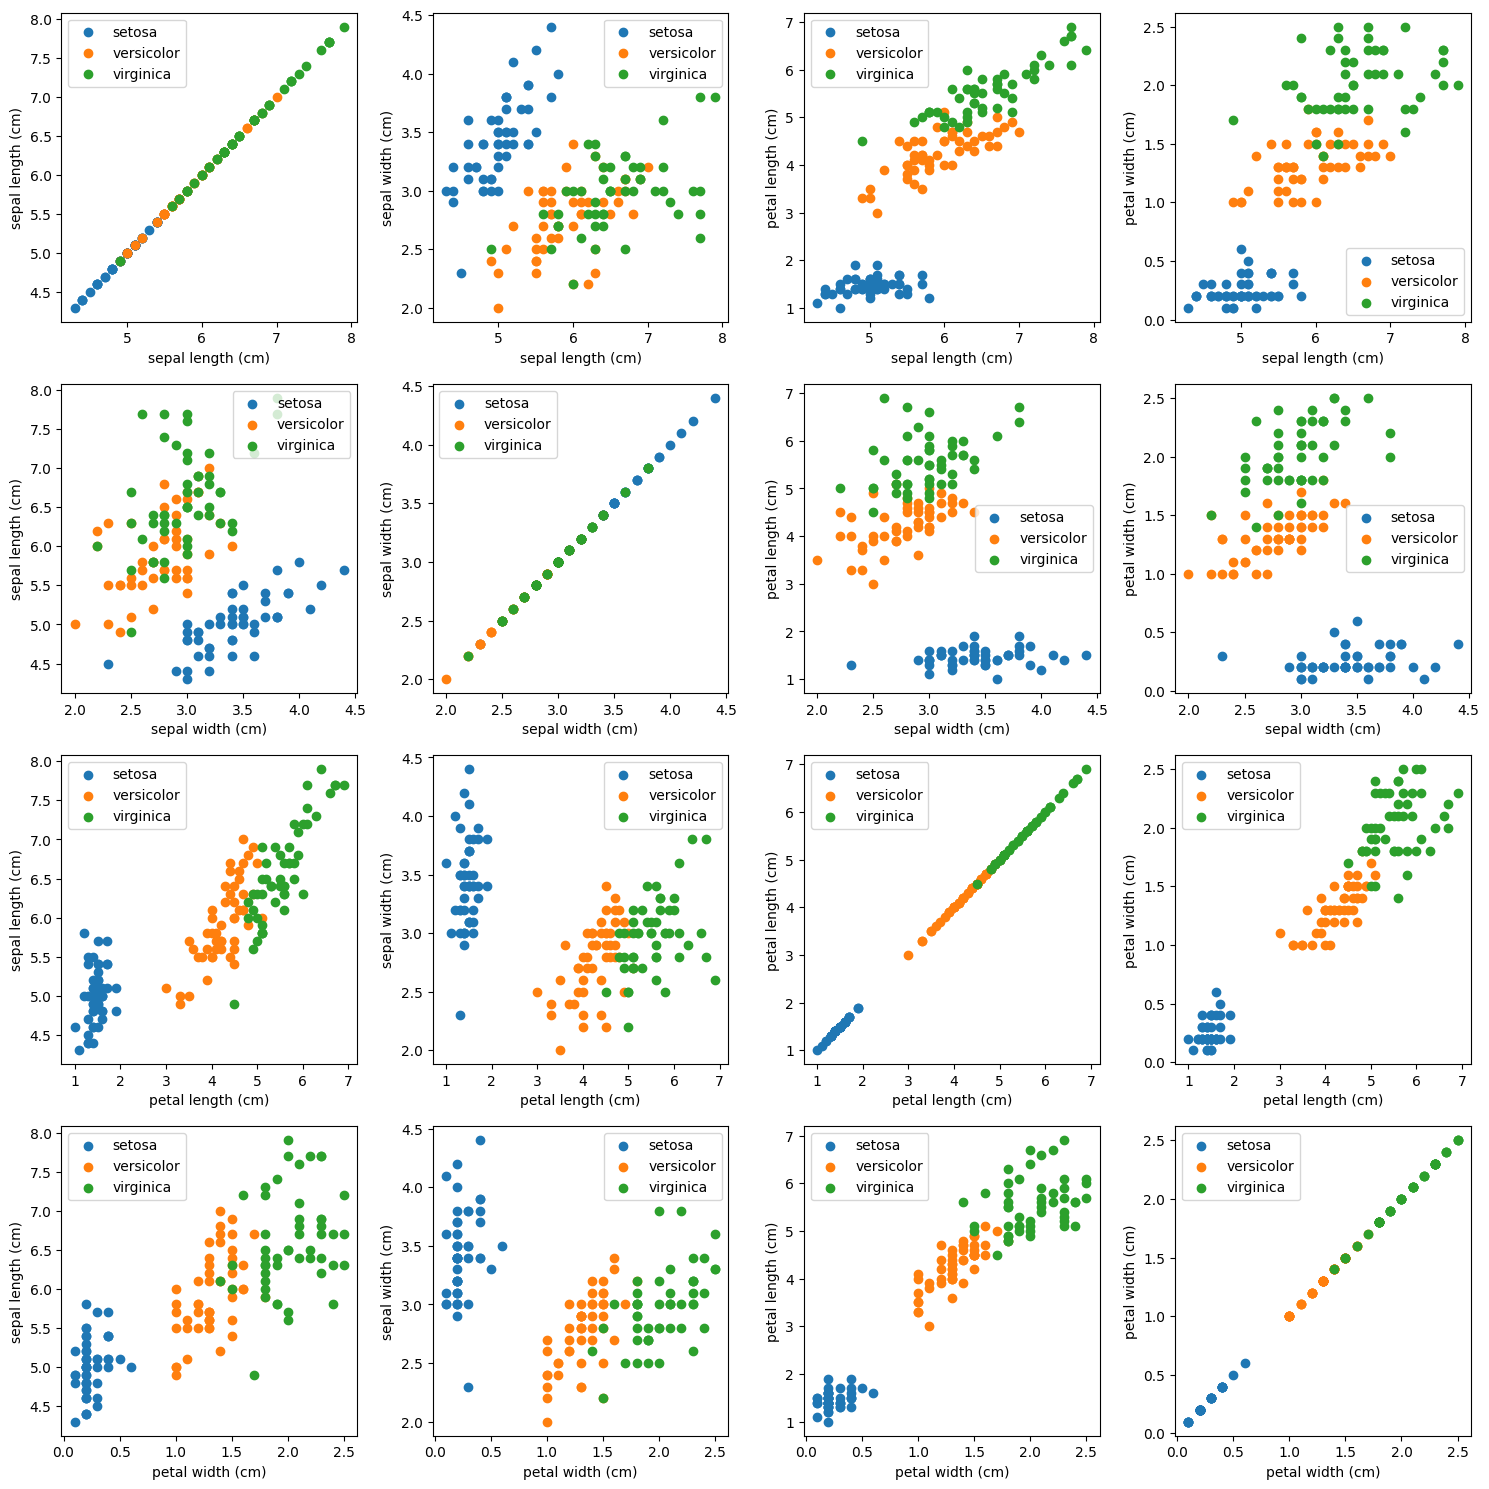

In [ ]:
plot_all_components(dataset, targets=targets_encoded)

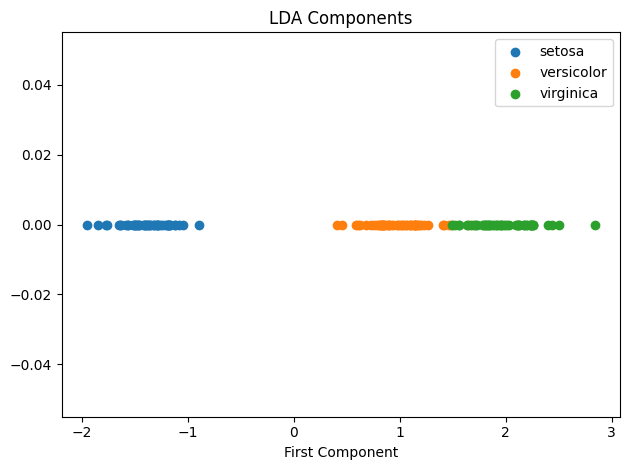

In [ ]:
plot_projected_components(projected_data_1_comp, title='LDA Components')

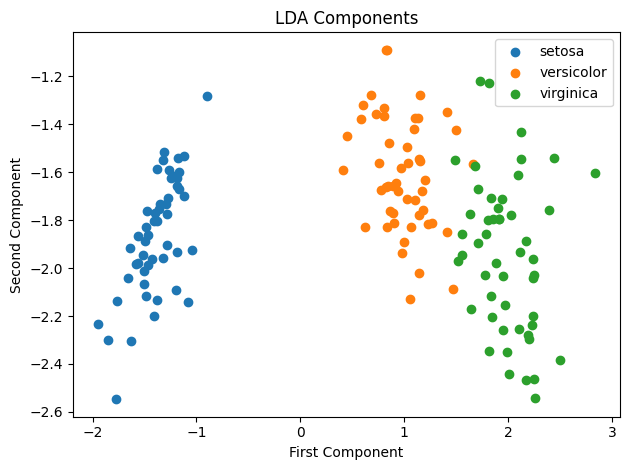

In [ ]:
plot_projected_components(projected_data_2_comp, title='LDA Components')

## **Comments**

- LDA maximizes the distance between different classes, while minimizing the within class variance, thus it serves both Discriminativity & Representativity purposes.

- The 1D plot tells us that LDA did a pretty good job in seperation between classes even with just one principle component (strongest component of the 2), thus we can say that it is discriminitive, however it didn't describe any of the variations in the data as you can see the overlaps of data points within the single class, thus we can't say that this component is representative.

- The 2D plot tells us that LDA did a pretty good job in both the seperation between classes as well as the describtion of the variance within the data, you can see this in the spread of the data points, thus we can say that these components are both discriminitive and representative.

- Notice that the 2D components described the variations in the data even better than any of the 2 combinitions (of the original data) present in the 16 plot figure, thus we succeeded in reducing our dimensions (the goal of LDA) as well as retaining our data variability.

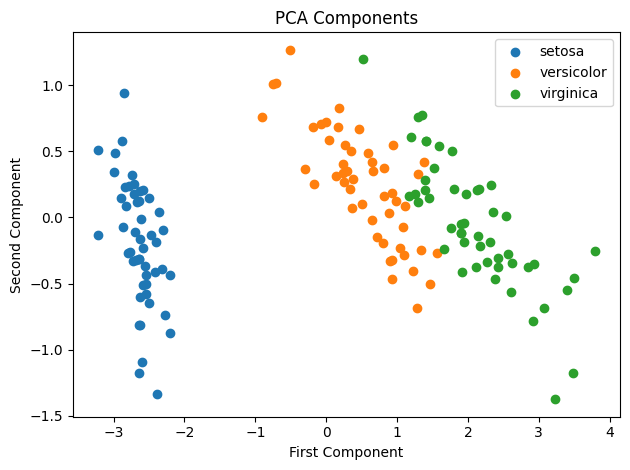

In [ ]:
plot_projected_components(pcs, title='PCA Components')

(150, 2)


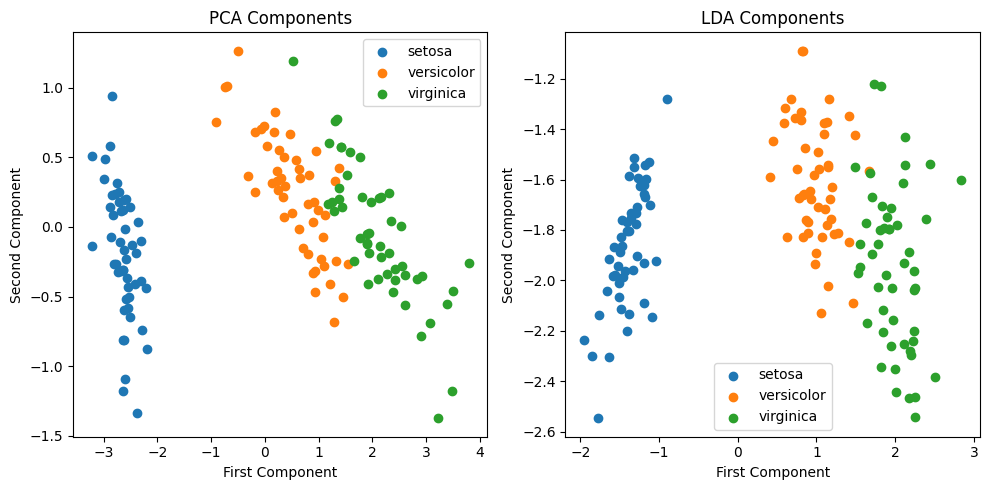

In [ ]:
plot_pca_lda_components(pcs, projected_data_2_comp)

## **Comments**

- Since LDA maximizes the distance between different classes, whereas PCA maximizes the variance of the data, we can see that in the last 2 plots that LDA performed slightly better in the separation between classes (especially in the first component's direcrion), whereas the PCA plot described the variance within the data better and this can be visualized by the more spread of the data (compared to LDA), not caring about the seperation between classes.

- Keeping in mind that LDA, however, performs better on large datasets with many classes, we can't really see the huge difference.